In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
from scipy.stats import zscore
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')
df_test= pd.read_excel('Test_set.xlsx')

In [3]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Combining the train and test datasets to perform data preprocessing

In [4]:
df_train['Temp']="Train"
df_test['Temp']="Test"
df = pd.concat([df_train,df_test],ignore_index=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Temp
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,Train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,Train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,Test
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,Test
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,Test
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,Test


EDA

In [5]:
df.shape

(13354, 12)

Columns name

In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Temp'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of                  Airline Date_of_Journey    Source Destination  \
0                 IndiGo      24/03/2019  Banglore   New Delhi   
1              Air India       1/05/2019   Kolkata    Banglore   
2            Jet Airways       9/06/2019     Delhi      Cochin   
3                 IndiGo      12/05/2019   Kolkata    Banglore   
4                 IndiGo      01/03/2019  Banglore   New Delhi   
...                  ...             ...       ...         ...   
13349          Air India       6/06/2019   Kolkata    Banglore   
13350             IndiGo      27/03/2019   Kolkata    Banglore   
13351        Jet Airways       6/03/2019     Delhi      Cochin   
13352          Air India       6/03/2019     Delhi      Cochin   
13353  Multiple carriers      15/06/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI 

Checking null values

In [8]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Temp                  0
dtype: int64

Only three columns Total_stops, Route and Price has null values.

In [9]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Temp                object
dtype: object

All the columns have object except price which float datatype

In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Finding unique values

In [11]:
print(df.nunique())

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               132
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           5
Additional_Info      10
Price              1870
Temp                  2
dtype: int64


Data Processing

In [12]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [13]:
df['Route'].isna().sum()
df['Total_Stops'].isna().sum()

0

In [14]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Temp                  0
dtype: int64

In [15]:
print(df['Airline'].value_counts())
print('')
df['Airline'].nunique()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64



12

In [16]:
# checking duplictes and adding them to a single catageory.
df["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)
df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [17]:
df['Airline'].value_counts()

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64

In [18]:
# creating a function to convert the respective values to datetime format.
def datetime(col):
    df[col]=pd.to_datetime(df[col])

In [19]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Temp'],
      dtype='object')

In [20]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    datetime(i)

In [21]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
Temp                       object
dtype: object

In [22]:
df.loc[:,['Date_of_Journey','Dep_Time', 'Arrival_Time']]

,Date_of_Journey,Dep_Time,Arrival_Time
0,2019-03-24,2021-08-21 22:20:00,2021-03-22 01:10:00
1,2019-01-05,2021-08-21 05:50:00,2021-08-21 13:15:00
2,2019-09-06,2021-08-21 09:25:00,2021-06-10 04:25:00
3,2019-12-05,2021-08-21 18:05:00,2021-08-21 23:30:00
4,2019-01-03,2021-08-21 16:50:00,2021-08-21 21:35:00
...,...,...,...
13349,2019-06-06,2021-08-21 20:30:00,2021-06-07 20:25:00
13350,2019-03-27,2021-08-21 14:20:00,2021-08-21 16:55:00
13351,2019-06-03,2021-08-21 21:50:00,2021-03-07 04:25:00
13352,2019-06-03,2021-08-21 04:00:00,2021-08-21 19:15:00


In [23]:
df['day']=df['Date_of_Journey'].dt.day
df['month']=df['Date_of_Journey'].dt.month
df.drop(['Date_of_Journey'],axis = 1, inplace = True)

In [24]:
df['Dep_hour']=df['Dep_Time'].dt.hour
df['Dep_min']=df['Dep_Time'].dt.minute
df['Arrival_hour']=df['Arrival_Time'].dt.hour
df['Arrival_minute']=df['Arrival_Time'].dt.minute
df.drop(['Arrival_Time'],axis = 1, inplace = True)

In [25]:
df.drop(['Dep_Time'],axis = 1, inplace = True)

Duration

In [26]:
df['duration'] = (pd.to_timedelta(df['Duration']).dt.seconds // 60).astype(str).astype(float)

In [27]:
df['duration']

0         170.0
1         445.0
2        1140.0
3         325.0
4         285.0
          ...  
13349    1435.0
13350     155.0
13351     395.0
13352     915.0
13353     860.0
Name: duration, Length: 13354, dtype: float64

In [28]:
#comparing both, Now duration is in minutes
df.loc[:,['Duration','duration']]

,Duration,duration
0,2h 50m,170.0
1,7h 25m,445.0
2,19h,1140.0
3,5h 25m,325.0
4,4h 45m,285.0
...,...,...
13349,23h 55m,1435.0
13350,2h 35m,155.0
13351,6h 35m,395.0
13352,15h 15m,915.0


In [29]:
df.drop(['Duration'],axis = 1, inplace = True)

In [30]:
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [31]:
df["Additional_Info"].replace("No info","No Info",inplace=True)
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
df["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

In [32]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Temp', 'day', 'month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minute', 'duration'],
      dtype='object')

In [33]:
print(df['Source'].value_counts())
print('****')
print(df['Source'].nunique())

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64
****
5


In [34]:
print(df['Destination'].value_counts())
print('****')
print(df['Destination'].isnull().sum())
print('****')
print(df['Destination'].nunique)

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64
****
0
****
<bound method IndexOpsMixin.nunique of 0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
13349     Banglore
13350     Banglore
13351       Cochin
13352       Cochin
13353       Cochin
Name: Destination, Length: 13354, dtype: object>


In [35]:
# we can see  delhi and new delhi is present in the column are belongs to same destination, so replacing new delhi with delhi.
df['Destination']=df['Destination'].replace('New Delhi','Delhi')

In [36]:
print(df['Destination'].value_counts())

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64


In [37]:
#lets check route column
print(df.Route.value_counts())
print('')
#lets check route column
df.Route.nunique()

DEL → BOM → COK                3001
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → NDC → HYD                   1
BOM → DED → DEL → HYD             1
CCU → IXA → BLR                   1
BOM → BLR → CCU → BBI → HYD       1
BLR → HBX → BOM → BHO → DEL       1
Name: Route, Length: 132, dtype: int64



132

In [38]:
# The Route column is having 132 unique values, extracting them as below.
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]

In [39]:
df.drop(['Route',],axis = 1, inplace = True)

In [40]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price               2671
Temp                   0
day                    0
month                  0
Dep_hour               0
Dep_min                0
Arrival_hour           0
Arrival_minute         0
duration               0
Route1                 0
Route2                 0
Route3              4340
Route4             11397
Route5             13296
dtype: int64

In [41]:
# changing NaN values to'NA'
for i in ['Route3', 'Route4', 'Route5']:
    df[i].fillna('NA',inplace=True)

In [42]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(dict)

In [43]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Temp,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,Delhi,0,No Info,3897.0,Train,24,3,22,20,1,10,170.0,BLR,DEL,NA,NA,NA
1,Air India,Kolkata,Banglore,2,No Info,7662.0,Train,5,1,5,50,13,15,445.0,CCU,IXR,BBI,BLR,NA
2,Jet Airways,Delhi,Cochin,2,No Info,13882.0,Train,6,9,9,25,4,25,1140.0,DEL,LKO,BOM,COK,NA
3,IndiGo,Kolkata,Banglore,1,No Info,6218.0,Train,5,12,18,5,23,30,325.0,CCU,NAG,BLR,NA,NA
4,IndiGo,Banglore,Delhi,1,No Info,13302.0,Train,3,1,16,50,21,35,285.0,BLR,NAG,DEL,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,1,No Info,NaN,Test,6,6,20,30,20,25,1435.0,CCU,DEL,BLR,NA,NA
13350,IndiGo,Kolkata,Banglore,0,No Info,NaN,Test,27,3,14,20,16,55,155.0,CCU,BLR,NA,NA,NA
13351,Jet Airways,Delhi,Cochin,1,No Info,NaN,Test,3,6,21,50,4,25,395.0,DEL,BOM,COK,NA,NA
13352,Air India,Delhi,Cochin,1,No Info,NaN,Test,3,6,4,0,19,15,915.0,DEL,BOM,COK,NA,NA


In [44]:
df.corr()

,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration
Total_Stops,1.000000,0.603883,-0.027965,0.068745,-0.070709,-0.000116,0.037154,-0.108233,0.592884
Price,0.603883,1.000000,-0.165412,0.010700,0.006819,-0.024492,0.024264,-0.086155,0.449471
day,-0.027965,-0.165412,1.000000,-0.263645,-0.006490,-0.018639,0.000968,-0.019054,-0.032953
month,0.068745,0.010700,-0.263645,1.000000,0.024008,0.002174,-0.001319,-0.028378,0.059362
Dep_hour,-0.070709,0.006819,-0.006490,0.024008,1.000000,-0.026674,0.004296,0.067645,-0.000379
Dep_min,-0.000116,-0.024492,-0.018639,0.002174,-0.026674,1.000000,0.043967,-0.018133,-0.017083
Arrival_hour,0.037154,0.024264,0.000968,-0.001319,0.004296,0.043967,1.000000,-0.150636,-0.023322
Arrival_minute,-0.108233,-0.086155,-0.019054,-0.028378,0.067645,-0.018133,-0.150636,1.000000,-0.125467
duration,0.592884,0.449471,-0.032953,0.059362,-0.000379,-0.017083,-0.023322,-0.125467,1.000000


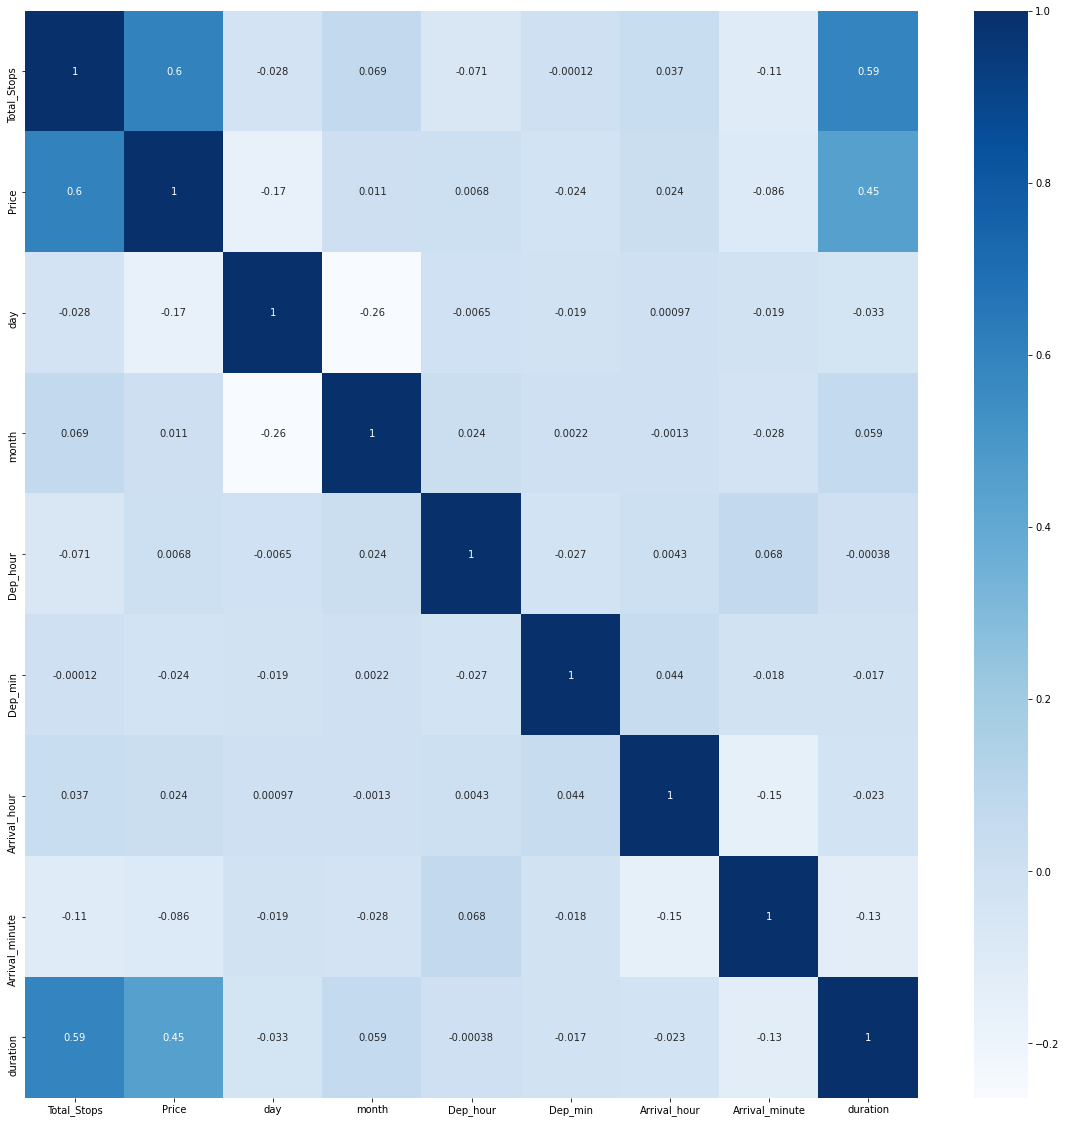

In [45]:
#correlation
fig = plt.figure(figsize=(20,20))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

Price is highly positive correlated with Total stops and higly negative correlated with Route 2 and Route3.

In [46]:
# checking skewness
df.skew()

Total_Stops       0.317797
Price             1.812552
day               0.389526
month             0.621749
Dep_hour          0.109087
Dep_min           0.159397
Arrival_hour     -0.384591
Arrival_minute    0.111711
duration          0.824423
dtype: float64

In [47]:
# checking skewness
df.skew()

Total_Stops       0.317797
Price             1.812552
day               0.389526
month             0.621749
Dep_hour          0.109087
Dep_min           0.159397
Arrival_hour     -0.384591
Arrival_minute    0.111711
duration          0.824423
dtype: float64

In [48]:
df['month'] = power_transform(df['month'].values.reshape(-1,1))
df['duration'] = power_transform(df['duration'].values.reshape(-1,1))

In [49]:
df.skew()

Total_Stops       0.317797
Price             1.812552
day               0.389526
month            -0.027619
Dep_hour          0.109087
Dep_min           0.159397
Arrival_hour     -0.384591
Arrival_minute    0.111711
duration         -0.039250
dtype: float64

In [50]:
encoder = LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    df[i]=encoder.fit_transform(df[i])

Data Visualization

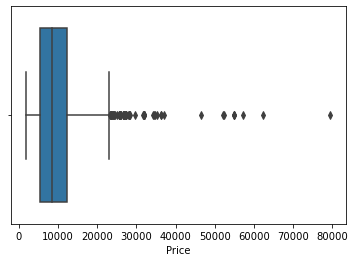

In [51]:
sns.boxplot(df.Price)
plt.show()

As shown in above plot price variable is consist of outliers

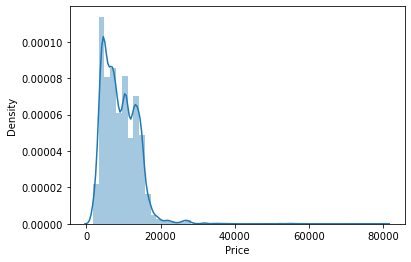

In [52]:
sns.distplot(df.Price[:10683])
plt.show()

In above plot, we can observe that the Price variable is consists of Right skewed.

Bivariate Analysis

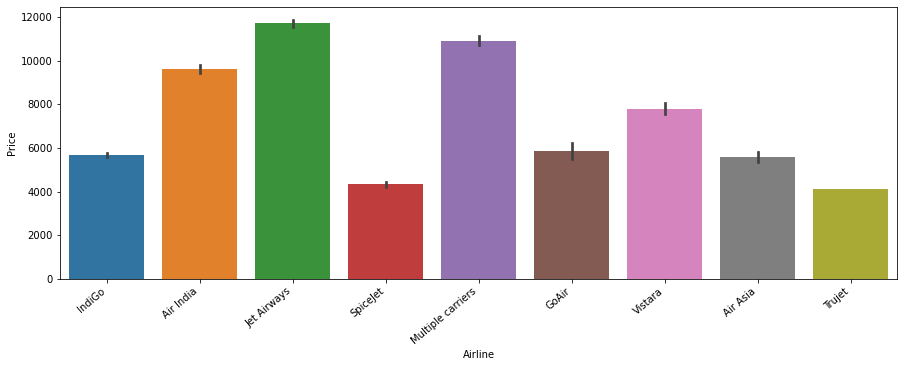

In [53]:
plt.figure(figsize= (15,5))
col2 = sns.barplot(x = 'Airline' , y ='Price', data = df )
col2.set_xticklabels(col2.get_xticklabels(), rotation=40, ha="right") 
plt.show()

Jet Airways is observed as the highest flight price among all the Airlines and spicejet is having low price.

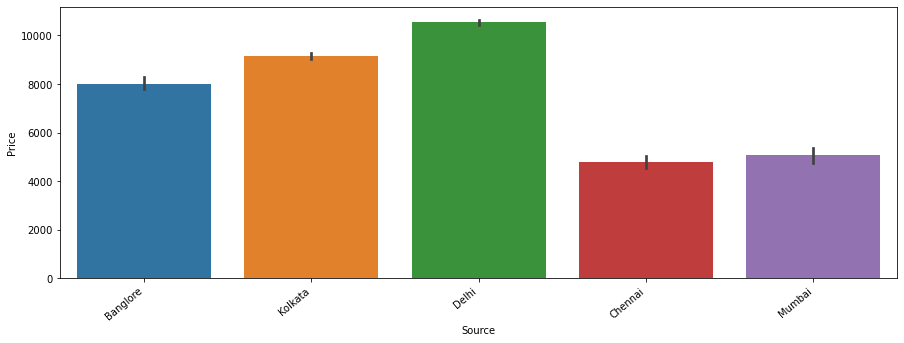

In [54]:
plt.figure(figsize= (15,5))
col4 = sns.barplot(x = 'Source' , y ='Price', data = df )
col4.set_xticklabels(col4.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that people who travelled from delhi have paid more than the others

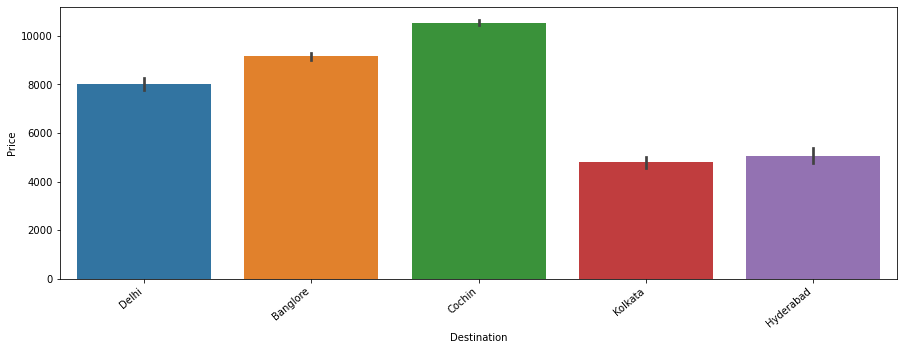

In [55]:
plt.figure(figsize= (15,5))
col3 = sns.barplot(x = 'Destination' , y ='Price', data = df )
col3.set_xticklabels(col3.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that people who travelled to Cohchin have paid more flight price compare to all

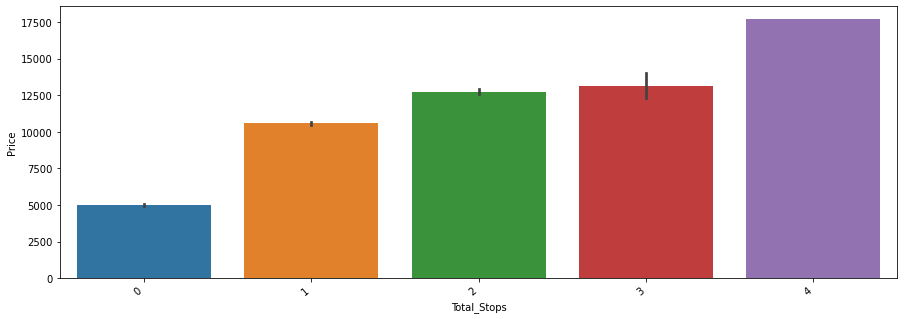

In [56]:
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Total_Stops' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can see that if the total stops is 4 , then the flight price is high

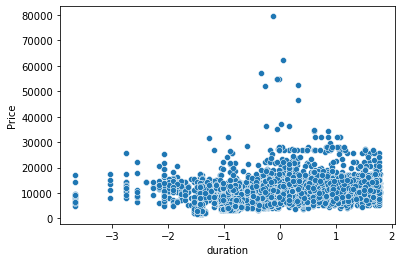

In [57]:
sns.scatterplot(x = 'duration', y ='Price' , data  = df)
plt.show()

 we can see above that duration and Price is moderate positive correlation with duration column

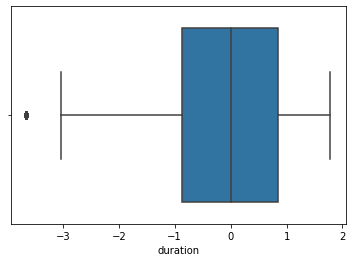

In [58]:
sns.boxplot(df.duration)
plt.show()

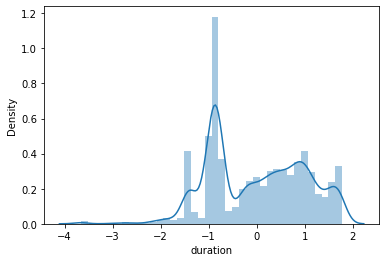

In [59]:
sns.distplot(df.duration)
plt.show()

Only one outlier are present,so neglecting in duration and seems like left skewed in distribution

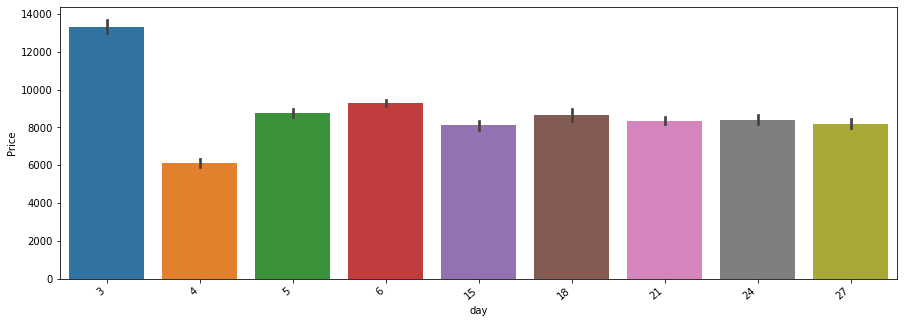

In [60]:
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'day' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in 3rd date of month having high price values

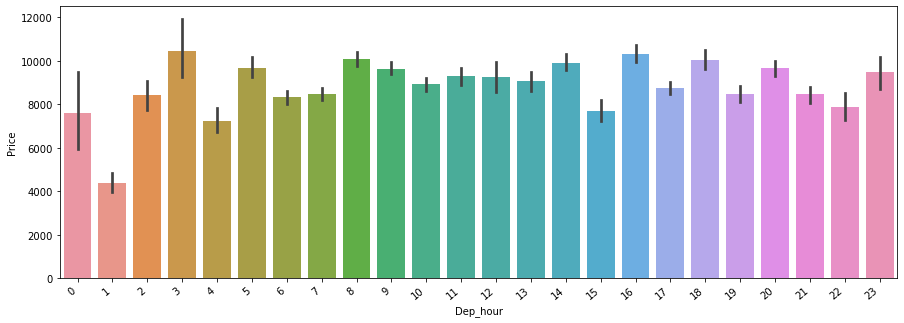

In [61]:
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Dep_hour' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in 3AM in Dep_hour is having high price values

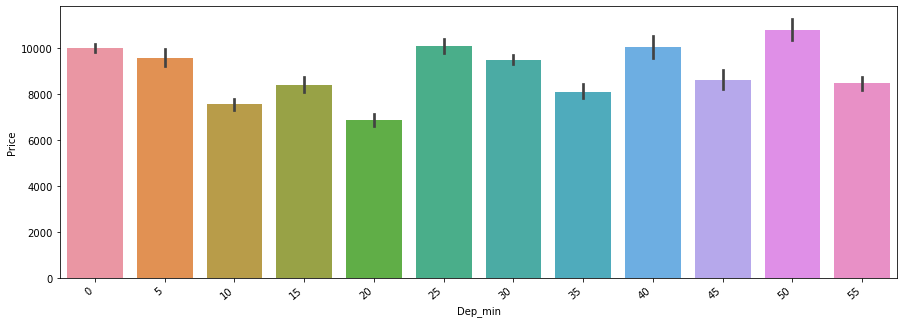

In [62]:
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Dep_min' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in 50th minute is having high price values.

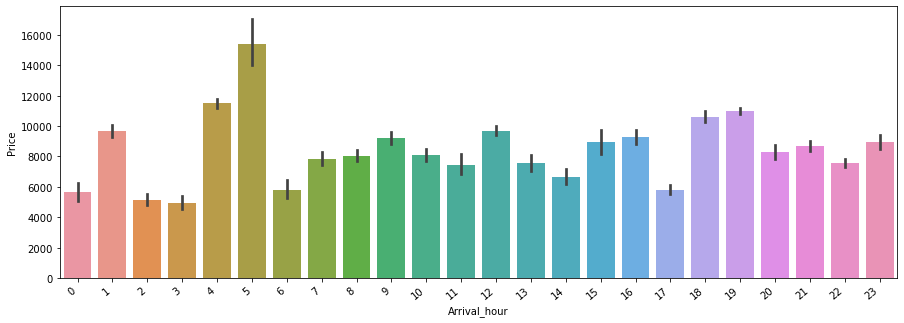

In [63]:
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Arrival_hour' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in 5AM in Arrival_hour is having high price values.

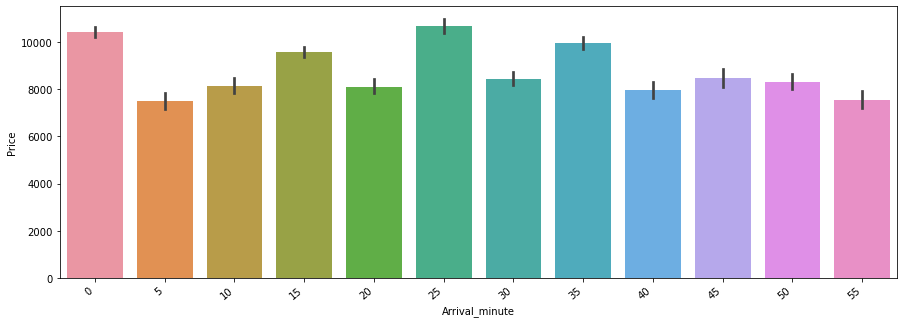

In [64]:
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Arrival_minute' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in 25th minute is having high price values.

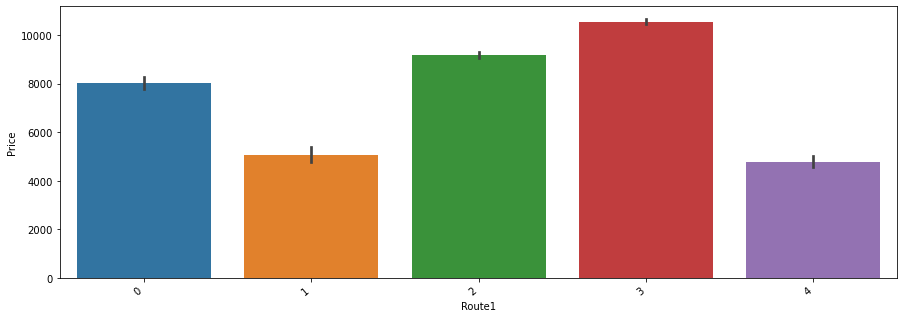

In [65]:
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Route1' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in Route5 3rd way is having high price values.

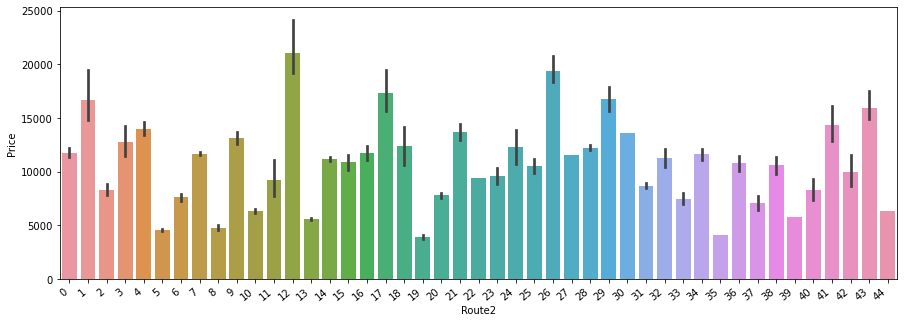

In [66]:
#Lets check Route2 column againt our target variable
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Route2' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in Route5 12th way is having high price values.

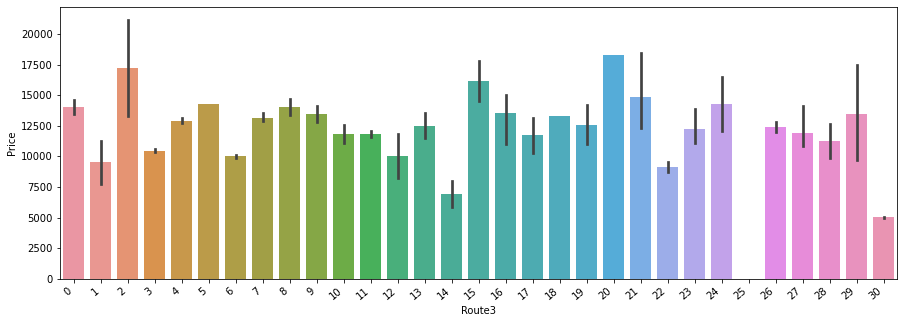

In [67]:
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Route3' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in Route5 20th way is having high price values.

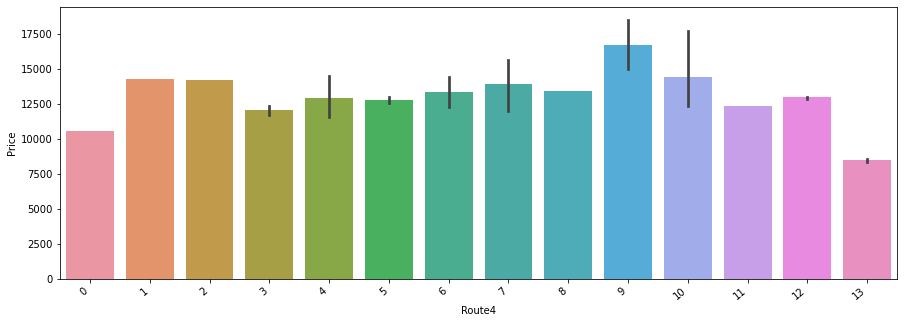

In [68]:
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Route4' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in Route5 9th way is having high price values.

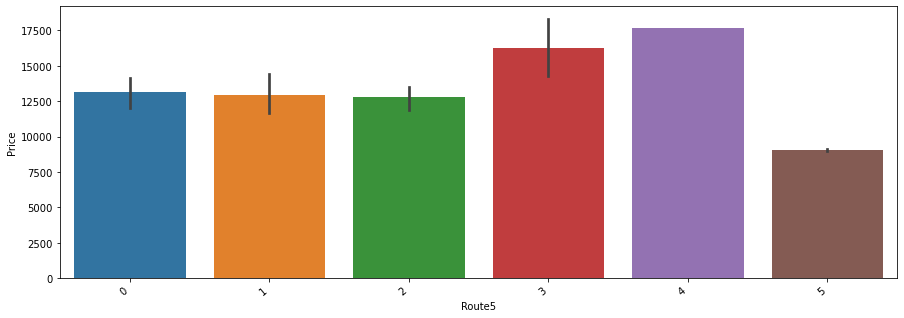

In [69]:
plt.figure(figsize= (15,5))
col5 = sns.barplot(x = 'Route5' , y ='Price', data = df )
col5.set_xticklabels(col5.get_xticklabels(), rotation=40, ha="right") 
plt.show()

From the above plot we can observe that in Route5 4th way is having high price values.

Outlier Removal in target column

In [70]:
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [71]:
#calling the function
outliers_IQR3(df,'Price')

<AxesSubplot:xlabel='Price'>

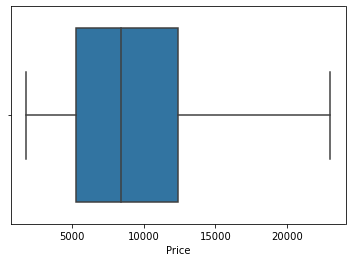

In [72]:
#now lets outliers using box plot
sns.boxplot(df.Price)

outliers have been completely removed from this column

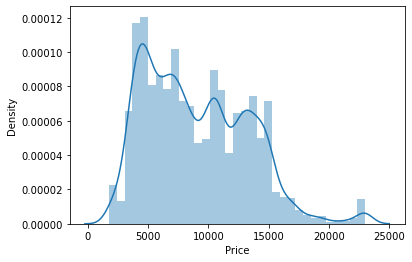

In [73]:
#lets check the distribution of the target column
sns.distplot(df.Price[:10683])
plt.show()

In [74]:
df.dtypes

Airline             object
Source              object
Destination         object
Total_Stops          int64
Additional_Info     object
Price              float64
Temp                object
day                  int64
month              float64
Dep_hour             int64
Dep_min              int64
Arrival_hour         int64
Arrival_minute       int64
duration           float64
Route1               int32
Route2               int32
Route3               int32
Route4               int32
Route5               int32
dtype: object

In [75]:
#we need convert the above columns one-hot encoder, since they are not ordinal values
#and also columns contains more than 2 unique values
one_hot_columns = ['Additional_Info','Airline', 'Destination','Source']
df_new = pd.get_dummies(data = df,columns=one_hot_columns)

In [76]:
pd.set_option('display.max_columns', None)
df_new

,Total_Stops,Price,Temp,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration,Route1,Route2,Route3,Route4,Route5,Additional_Info_1 Short layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897.0,Train,24,-0.821582,22,20,1,10,-0.837340,0,13,30,13,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2,7662.0,Train,5,-1.881643,5,50,13,15,0.182267,2,25,1,3,5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,2,13882.0,Train,6,1.131173,9,25,4,25,1.431627,3,32,4,5,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218.0,Train,5,1.839000,18,5,23,30,-0.176733,2,34,3,13,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,13302.0,Train,3,-1.881643,16,50,21,35,-0.319000,0,34,8,13,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1,NaN,Test,6,0.283045,20,30,20,25,1.781988,2,14,3,13,5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
13350,0,NaN,Test,27,-0.821582,14,20,16,55,-0.923435,2,5,30,13,5,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
13351,1,NaN,Test,3,0.283045,21,50,4,25,0.042940,3,7,6,13,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
13352,1,NaN,Test,3,0.283045,4,0,19,15,1.114249,3,7,6,13,5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


Scaling the Data

In [77]:
Y = df_new['Price']
X = df_new.drop('Price',axis = 1)

In [78]:
temp = X['Temp']
X.drop('Temp',axis =1 ,inplace = True)

In [79]:
X.shape

(13354, 40)

In [80]:
Y.shape

(13354,)

In [81]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
scaled_X.head()

,Total_Stops,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration,Route1,Route2,Route3,Route4,Route5,Additional_Info_1 Short layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,-1.224526,1.307001,-0.821582,1.653879,-0.239345,-1.797602,-0.885564,-0.837340,-1.672466,0.137945,1.403564,0.409595,0.064325,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,2.051406,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,-0.605324,-0.860590,1.962771,-0.266091,-0.188027,1.962771,-0.188027,-0.860590,-0.605324,-0.266091
1,1.740268,-0.862038,-1.881643,-1.309829,1.353715,-0.057434,-0.583615,0.182267,-0.012863,1.641200,-1.065884,-2.978701,0.064325,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,2.256580,-0.135281,-0.487470,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,1.652007,-0.860590,-0.509484,-0.266091,-0.188027,-0.509484,-0.188027,-0.860590,1.652007,-0.266091
2,1.740268,-0.747878,1.131173,-0.612486,0.026165,-1.362560,0.020282,1.431627,0.816939,2.518099,-0.810424,-2.301042,0.064325,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,-0.487470,1.344992,-0.363558,-0.288488,-0.008654,-0.219345,-0.605324,1.161993,-0.509484,-0.266091,-0.188027,-0.509484,-0.188027,1.161993,-0.605324,-0.266091
3,0.257871,-0.862038,1.839000,0.956536,-1.035875,1.392705,0.322231,-0.176733,-0.012863,2.768642,-0.895577,0.409595,0.064325,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,2.051406,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,1.652007,-0.860590,-0.509484,-0.266091,-0.188027,-0.509484,-0.188027,-0.860590,1.652007,-0.266091
4,0.257871,-1.090358,-1.881643,0.607864,1.353715,1.102677,0.624180,-0.319000,-1.672466,2.768642,-0.469810,0.409595,0.064325,-0.008654,-0.019354,-0.024483,-0.471167,-0.039687,0.521818,-0.174815,-0.008654,-0.176852,-0.443148,-0.135281,2.051406,-0.743499,-0.363558,-0.288488,-0.008654,-0.219345,-0.605324,-0.860590,1.962771,-0.266091,-0.188027,1.962771,-0.188027,-0.860590,-0.605324,-0.266091


PCA (Principal Component Analysis)

In [82]:
#we have 44 columns excluding target variable
scaled_X.shape

(13354, 40)

In [83]:
testpca = PCA()
test_x = testpca.fit(scaled_X)

In [84]:
#cumulative score 
cum_score = np.cumsum(test_x.explained_variance_ratio_)*100
cum_score

array([ 13.86125573,  22.07244204,  29.31140809,  35.55202922,
        41.39043079,  45.99256063,  49.86546944,  53.00919357,
        55.98740165,  58.89663655,  61.70990827,  64.34213169,
        66.95499894,  69.49635251,  72.00066707,  74.5019475 ,
        76.99870886,  79.46507769,  81.909502  ,  84.34047337,
        86.59517681,  88.70019165,  90.61101632,  92.40699837,
        94.06441145,  95.60379674,  96.99529425,  98.28675843,
        99.22055507,  99.96456071, 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ])

In [85]:
s = np.argmax(cum_score > 95)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 25


In [86]:
s = np.argmax(cum_score > 90)
print("Number of components expaining 90% of variance is :", s)

Number of components expaining 90% of variance is : 22


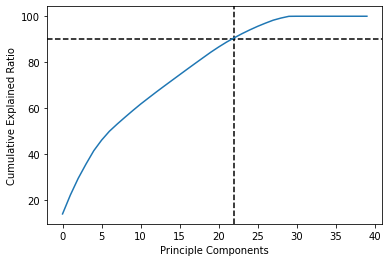

In [87]:
#plotting the graph
plt.ylabel('Cumulative Explained Ratio')
plt.xlabel('Principle Components')

plt.axvline(x = s, color = 'k', linestyle = '--')
plt.axhline(y = 90, color = 'k', linestyle = '--')

plt.plot(cum_score)
plt.show()

In [88]:
Final_pca = PCA(n_components= 22)
pca_x = pd.DataFrame(Final_pca.fit_transform(scaled_X))

In [89]:
pca_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,3.590799,-1.056766,-1.825900,0.159229,-1.184414,-0.593570,-0.261107,1.555557,-1.659028,0.078016,0.919111,0.485027,0.747040,-0.555630,0.438147,-0.178308,0.115645,-0.435177,0.782515,0.007334,0.593609,-1.288414
1,-1.237743,1.664827,0.543078,3.489949,1.172356,2.888563,0.226856,-0.107903,0.269969,1.133438,1.417072,-0.075743,-0.449667,0.421694,0.225848,-0.066327,0.018427,-0.184428,-0.408401,0.592402,-1.530843,-0.415496
2,-3.290174,-0.325446,-1.025602,0.469217,1.211567,1.997883,-0.435426,1.054118,0.245755,-1.975141,0.167487,-0.151086,-0.119062,0.878242,0.381844,-0.105053,0.062417,-0.522855,-0.981706,0.621432,-0.086494,-0.795390
3,0.312240,1.385359,1.416272,2.361636,0.367936,-0.770998,-0.868473,-0.324917,-0.199033,-1.848004,1.682844,-0.655913,0.461624,-0.285386,0.157239,-0.278197,0.197822,-0.227455,-0.288913,1.164891,1.408129,1.286123
4,2.534256,-0.600569,-2.477700,1.292924,-0.335006,0.756173,-0.699680,0.476820,0.251648,0.376263,2.187684,-0.398046,-0.051253,0.131791,0.490032,-0.439742,0.233010,-0.624859,-0.669423,1.235113,1.030568,-0.467137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,-0.522499,2.178526,1.088303,2.640147,-0.032532,0.296955,-0.020144,-1.002418,0.519936,0.094898,-0.111944,0.419520,-0.229215,-0.929897,0.101269,-0.095862,-0.058668,-0.361377,0.997533,0.319999,0.000697,0.042521
13350,2.026840,0.742900,1.972109,1.478200,-0.588959,-1.827705,-0.174462,1.573683,-1.686204,1.203608,0.706292,-0.554040,0.058292,-0.200275,-0.107101,0.036683,0.121644,0.266006,0.064380,-0.076773,0.205571,0.926013
13351,-1.697388,-0.247787,-0.200245,-0.722215,-0.139029,-0.330230,-0.340216,1.199082,1.044858,-1.016184,-0.741340,0.544355,-0.412336,-0.265907,0.226822,-0.079054,-0.080205,-0.683908,0.326821,0.129986,1.109031,-1.546605
13352,-2.306567,-1.245397,-0.319066,1.004622,-0.087040,0.120293,0.144707,-1.417111,-0.148017,-0.518588,-0.174989,0.463813,-0.393766,-0.548053,-0.359873,0.248506,-0.105048,0.283768,0.656249,-0.103411,-0.968652,1.255685


In [90]:
print("variance is : {}".format(np.sum(Final_pca.explained_variance_ratio_)))

variance is : 0.8870019165014901


split the data

In [91]:
pca_x['Temp'] = temp

In [92]:
pca_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,Temp
0,3.590799,-1.056766,-1.825900,0.159229,-1.184414,-0.593570,-0.261107,1.555557,-1.659028,0.078016,0.919111,0.485027,0.747040,-0.555630,0.438147,-0.178308,0.115645,-0.435177,0.782515,0.007334,0.593609,-1.288414,Train
1,-1.237743,1.664827,0.543078,3.489949,1.172356,2.888563,0.226856,-0.107903,0.269969,1.133438,1.417072,-0.075743,-0.449667,0.421694,0.225848,-0.066327,0.018427,-0.184428,-0.408401,0.592402,-1.530843,-0.415496,Train
2,-3.290174,-0.325446,-1.025602,0.469217,1.211567,1.997883,-0.435426,1.054118,0.245755,-1.975141,0.167487,-0.151086,-0.119062,0.878242,0.381844,-0.105053,0.062417,-0.522855,-0.981706,0.621432,-0.086494,-0.795390,Train
3,0.312240,1.385359,1.416272,2.361636,0.367936,-0.770998,-0.868473,-0.324917,-0.199033,-1.848004,1.682844,-0.655913,0.461624,-0.285386,0.157239,-0.278197,0.197822,-0.227455,-0.288913,1.164891,1.408129,1.286123,Train
4,2.534256,-0.600569,-2.477700,1.292924,-0.335006,0.756173,-0.699680,0.476820,0.251648,0.376263,2.187684,-0.398046,-0.051253,0.131791,0.490032,-0.439742,0.233010,-0.624859,-0.669423,1.235113,1.030568,-0.467137,Train


In [93]:
X_train_original = pca_x.loc[pca_x["Temp"] == "Train"]
X_test_original = pca_x.loc[pca_x["Temp"]=="Test"]

In [94]:
Y.dropna(inplace=True)
Y.shape

(10683,)

In [95]:
X_train_original.shape

(10683, 23)

In [96]:
X_test_original.shape

(2671, 23)

In [97]:
X_train_original.drop('Temp',axis = 1,inplace  =True)

In [98]:
X_test_original.drop('Temp',axis = 1,inplace  =True)

Random State

In [99]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state))

Best r2 score is 0.6302064590211616 on random state 19


In [100]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 19


In [101]:
x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= rand_state )

In [102]:
lrg = LinearRegression()
lrg.fit(x_train,y_train)
pr =lrg.predict(x_test)
print("r2_score of linear refression is :", r2_score(y_test,pr))
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error : ', mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

r2_score of linear refression is : 0.6302064590211616
Error :
mean absolute error : 4536.991286759044
mean squared error :  167290476.30182323
root mean squared error : 12934.081965946529


Model selection

In [103]:
dtc = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [104]:
model_list = [dtc,knn,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,X_train_original,Y,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.abs(r2_score(y_test,pred) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
    least_difference.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(difference)))



DecisionTreeRegressor()
Scores :
r2 score: 0.6488469462334607
Cross Val score : 0.661718522239223
Error :
mean absolute error : 1369.257337303275
mean squared error :  6390604.628243301
root mean squared error : 2527.96452274222
Difference :
Diffrence between cross val score and r2 score is : 0.01


KNeighborsRegressor()
Scores :
r2 score: 0.80900135301018
Cross Val score : 0.7934614014133123
Error :
mean absolute error : 1175.7146746065505
mean squared error :  3475968.169289664
root mean squared error : 1864.3948533745913
Difference :
Diffrence between cross val score and r2 score is : 0.02


RandomForestRegressor()
Scores :
r2 score: 0.8358978080351679
Cross Val score : 0.8201448481717607
Error :
mean absolute error : 1101.4279120975202
mean squared error :  2986481.8666009754
root mean squared error : 1728.1440526185818
Difference :
Diffrence between cross val score and r2 score is : 0.02


AdaBoostRegressor()
Scores :
r2 score: 0.44758476678239345
Cross Val score : 0.46219233877

In [ ]:
#finding the least difference
least_difference

Hyperparameter Tuning

In [119]:
parameters = {'n_estimators' : [100,200,300],'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
gsvrf = RandomizedSearchCV(rf, parameters, cv=5)

In [107]:
best_params_rf = {'n_estimators': 300,
                  'max_features' : 'log2',
                'criterion': 'mae'}

Creating a Final Model as Random Forest Regressor

In [108]:
final_model_rf = RandomForestRegressor(n_estimators= 300,criterion= 'mae',max_features = 'log2')
final_model_rf.fit(x_train,y_train)
final_pred = final_model_rf.predict(x_test)
cvs = cross_val_score(final_model_rf,X_train_original,Y,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test,final_pred))
print('Cross Val score :',cvs.mean())
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,final_pred))
print('mean squared error : ', mean_squared_error(y_test,final_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,final_pred)))
print('Difference :')
difference = np.abs(r2_score(y_test,final_pred) - cvs.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
least_difference.append((m,'Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference)))



Scores :
r2 score: 0.8316336921050383
Cross Val score : 0.8211598696281275
Error :
mean absolute error : 1131.891051325677
mean squared error :  3064084.150579884
root mean squared error : 1750.4525559351457
Difference :
Diffrence between cross val score and r2 score is : 0.01


Saving model

In [109]:
joblib.dump(final_model_rf,'Flight_Price.obj')

['Flight_Price.obj']

In [110]:
Flight_Price = joblib.load('Flight_Price.obj')

In [111]:
s_pred = Flight_Price.predict(x_test)

In [112]:
r2_score(y_test,s_pred)

0.8316336921050383

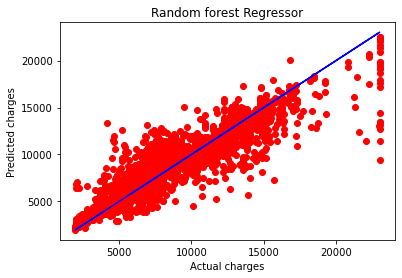

In [113]:
plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = s_pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Random forest Regressor')
plt.show()

values are very close to the line

X_test Predicted

In [114]:
conclusion = pd.DataFrame((Flight_Price.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

Result

In [115]:
final_y_predicted = Flight_Price.predict(X_test_original)

In [116]:
final_y_predicted.shape

(2671,)

In [122]:
FINAL_Y_PREDICTED  = pd.DataFrame(final_y_predicted,columns = ['FINAL_Y_PREDICTED'])
FINAL_Y_PREDICTED

,FINAL_Y_PREDICTED
0,15441.470000
1,6404.653333
2,10891.181667
3,9633.740000
4,3696.086667
...,...
2666,10060.893333
2667,5284.336667
2668,15064.940000
2669,11266.293333
